<a href="https://colab.research.google.com/github/shreyash-hash/Google-Colabs/blob/main/SpamMessageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import pandas as pd

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
def lemmatization(text):
  doc = nlp(text) #nlp pipeline
  #list comprehension
  lemmalist = [token.lemma_ for token in doc]
  return ' '.join(lemmalist)

In [ ]:
df['lemma'] = df['sms'].apply(lemmatization)

In [ ]:
df.head()

,sms,label,lemma
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl..."
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I do not think he go to usf , he live arou..."


In [ ]:
def remove_stopwords(text):
  doc = nlp(text)
  #extract text such that it is not a stopword
  no_stopwords = [token.text for token in doc if not token.is_stop and not token.is_punct]
  return ' '.join(no_stopwords)

In [ ]:
df['preprocessed'] = df['lemma'].apply(remove_stopwords)

In [ ]:
df.tail()

,sms,label,lemma,preprocessed
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...,2nd time try 2 contact u. U win £ 750 Pound pr...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n,ü b esplanade fr home \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe...",pity mood suggestion \n
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...,guy bitching act like interested buy week free \n
5573,Rofl. Its true to its name\n,0,rofl . its true to its name \n,rofl true \n


In [ ]:
#input data
X = df['preprocessed']
#target feature
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((4459,), (1115,))

In [ ]:
#building model random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
model = Pipeline([
    ('cvecterizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('cvecterizer_tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())])

In [ ]:
model.score(X_test, y_test) * 100

98.02690582959642

In [ ]:
pred = model.predict(X_test)

In [ ]:
y_test[:5]

,label
3690,0
3527,0
724,0
3370,0
468,0


In [ ]:
pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       1.00      0.86      0.93       161

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

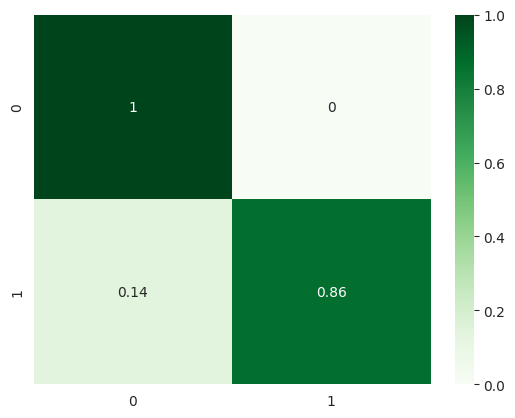

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
cf = confusion_matrix(y_test, pred, normalize = 'true')

sns.heatmap(cf, annot = True, cmap = 'Greens')

model predicts all ham messages correctly, model shows high precision and recall.